In [1]:
import pandas as pd

gdp = pd.read_csv('data/gdp.csv',header=0).dropna()
exchange_rate = pd.read_csv('data/exchange_rate.csv',header=0).dropna()
gdp_quarter = gdp.groupby('quarter').mean()

def discard_date(string):
    splits = string.split('/')
    year = splits[2]
    month = splits[1]
    half_year = 'H1' 
    
    if(int(year) <= 20):
        year = '20' + str(year) 
    else:
        year = '19' + str(year)
    
    if( int(month) > 6):
        half_year = 'H2'
        
    return year + '-' + half_year

exchange_rate['date'] = exchange_rate['date'].apply(discard_date)
exchange_rate = exchange_rate.groupby('date').mean()
exchange_rate.index.names =['half_year']
exchange_rate = exchange_rate.rename(columns={'value':'exchange_rate'})

def discard_me(string):
    splits = string.split('-')
    year = splits[0]
    quartile = splits[1]
    half_year = 'H1'
    
    if(str(quartile) == 'Q3' or str(quartile) == 'Q4'):
        half_year = 'H2'
    
    return year + '-' + half_year

gdp['quarter'] = gdp['quarter'].apply(discard_me)
gdp = gdp.groupby('quarter').mean()
gdp.index.names =['half_year']
gdp= gdp.rename(columns={'value':'GDP'})

print(exchange_rate, gdp)

           exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859


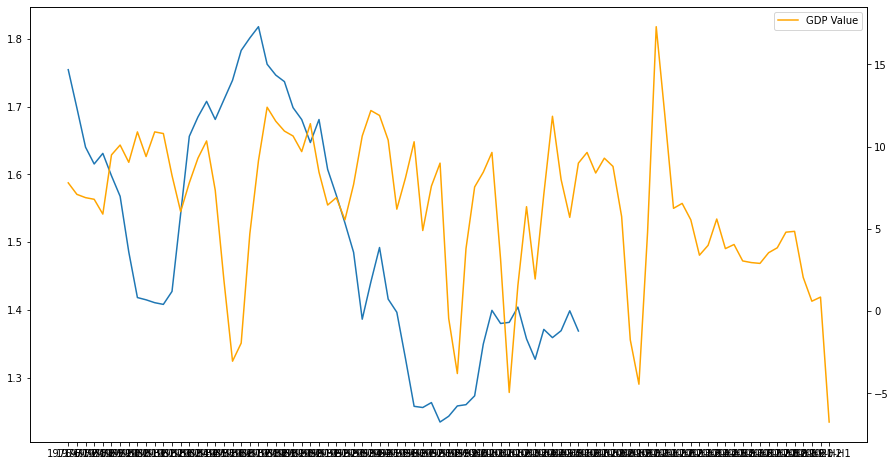

In [14]:
import matplotlib.pyplot as plt

#plt.plot(exchange_rate['value'])
#plt.show()

fig, ax= plt.subplots(figsize=(15,8))
ax.plot(exchange_rate['exchange_rate'], label='Exchange Rate')

ax2 = ax.twinx()
ax2.plot(gdp['GDP'], color='orange', label='GDP Value')

plt.legend()
plt.show()

In [16]:
merged = pd.merge(exchange_rate, gdp, on='half_year')
#print(merged)
merged.corr()

,exchange_rate,GDP
exchange_rate,1.000000,0.054232
GDP,0.054232,1.000000
